In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


SyntaxError: invalid syntax (2318158392.py, line 7)

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.shape

(2200, 8)

In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

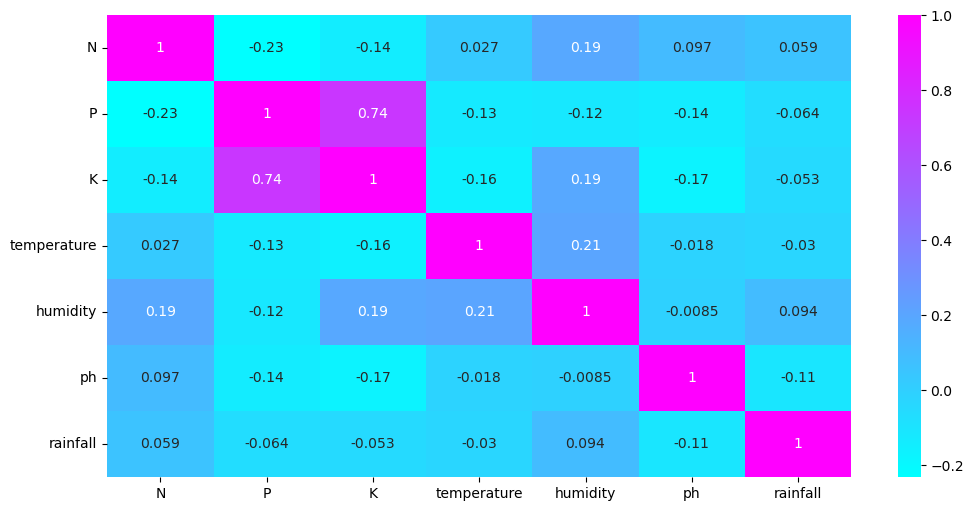

In [8]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)

In [9]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

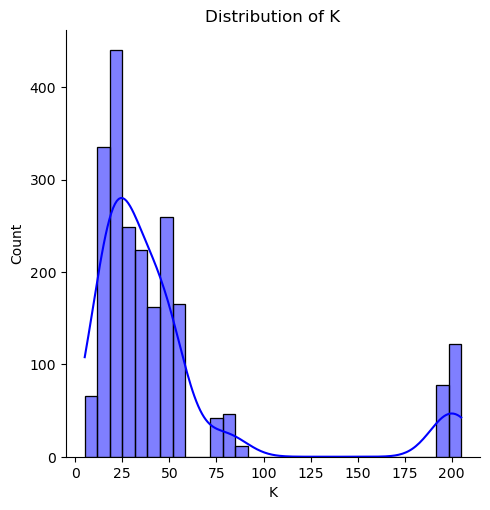

In [10]:
sns.displot(df['K'], kde='kde', color='blue',bins=30)
plt.title('Distribution of K')
plt.show()

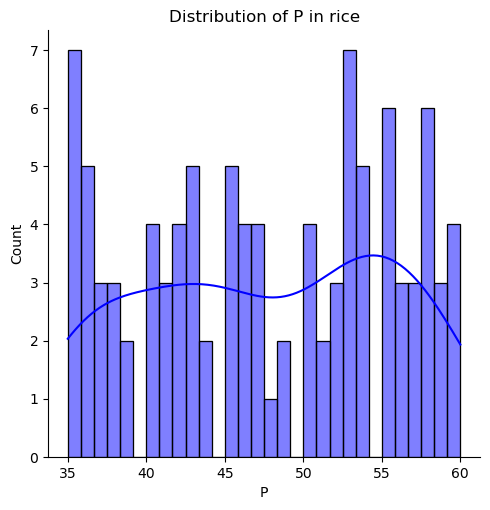

In [11]:
sns.displot(df[df.label=='rice']['P'], kde='kde', color='blue',bins=30)
plt.title('Distribution of P in rice')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df['label'] = label_enc.fit_transform(df.label)

In [13]:
X = df.drop('label',axis=1)
y = df.label

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
models = {'Logistic Regression': LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Tree': DecisionTreeClassifier(),
         "SVC": SVC(),
         "XGBoost": XGBClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores

In [ ]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

The scores are very high so i want to make sure best results weather or not fitted well.

In [ ]:
model1 = XGBClassifier(random_state=42)
model1.fit(X_train,y_train)
model1.score(X_train,y_train),model1.score(X_test,y_test)

In [ ]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train,y_train)
model2.score(X_train,y_train),model2.score(X_test,y_test)

In [ ]:
# hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

rf_model = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=10,verbose=True)

# fitting
rf_model.fit(X_train,y_train)

In [ ]:
rf_model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_model,X,y,cv=5).mean()

In [ ]:
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_preds = model1.predict(X_test)

print(classification_report(y_test,y_preds))

In [ ]:
from sklearn.metrics import confusion_matrix as cm
conf_mat = cm(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [20]:
c.NotebookApp.token = ''
c.NotebookApp.password = ''

NameError: name 'c' is not defined